In [1]:
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()

In [2]:
print("Predictors: ", cancer1.feature_names)

Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
print("\nResponse: ", cancer1.target_names)


Response:  ['malignant' 'benign']


In [4]:
import pandas as pd

cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer.columns = cancer.columns.str.replace(' ','_')

cancer.shape

(569, 30)

In [5]:
# Add a column for the response variable: malignant or benign
cancer['Target'] = cancer1.target

In [6]:
# Take a look at the DataFrame again to double check we added the column properly
cancer.shape

(569, 31)

In [7]:
from sklearn.model_selection import train_test_split

# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = cancer.iloc[:,:10]

# Select the response column 
y = cancer.Target

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)

In [8]:
import statsmodels.formula.api as smf
import pandas as pd

# Create the formula string 
all_columns = ' + '.join(cancer.columns[:10])
formula = "Target ~ " + all_columns 
print("Formula: ", formula, "\n")

Formula:  Target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension 



In [9]:
# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Optimization terminated successfully.
         Current function value: 0.131593
         Iterations 11


In [10]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  426
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           10
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.8004
Time:                        10:09:14   Log-Likelihood:                -56.059
converged:                       True   LL-Null:                       -280.92
Covariance Type:            nonrobust   LLR p-value:                 2.402e-90
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17.1132     15.041      1.138      0.255     -12.368      46.594
mean_radius               -0.1786      4.151     -0.043      0.966      -8.315       7.958
mean_texture              -0.4333      0.079     -5.479      0.000      -0.588      -0.278
mean_perimeter             0.2724      0.569      0.479      0.632      -0.842       1.387
mean_area                 -0.0301      0.019     -1.617      0.106      -0.067       0.006
mean_smoothness          -90.0668     38.119     -2.363      0.018    -164.778     -15.356
mean_compactness          -9.5962     23.305     -0.412      0.681     -55.273      36.080
mean_concavity           -11.5117      9.451     -1.218      0.223     -30.035       7.011
mean_concave_points      -47.8953     32.398     -1.478      0.139    -111.394      15.603
mean_symmetry            -23.1823     12.730     -1.821      0.069     -48.133       1.768
mean_fractal_dimension    91.5592     98.116      0.933      0.351    -100.745     283.863
==========================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.958041958041958


In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[49  5]
 [ 1 88]]


In [13]:
import matplotlib.pyplot as plt

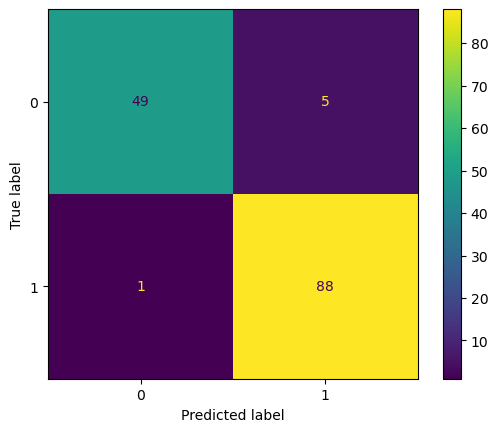

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()